In [2]:
from sherlock.utils import approximate_pareto
import glob
import json
import os
import matplotlib.pyplot as plt
import numpy as np

In [3]:
METRICS_PATH = "./metrics"
all_metrics = {}
for fname in glob.iglob(METRICS_PATH + "/*.json"):
    quant_config = "_".join(os.path.basename(fname.replace(" (1)", ""))[:-5].split("_")[-5:])
    with open(fname, "r") as f:    
        metrics_data = json.load(f)
    metrics_data["time"] =  os.path.getmtime(fname)
    all_metrics[quant_config] = metrics_data

y_list = []
ids = []
for k, v in all_metrics.items():
    ids.append(k)
    y_list.append([v["performance"],1/(v["bops"]/1e6)])

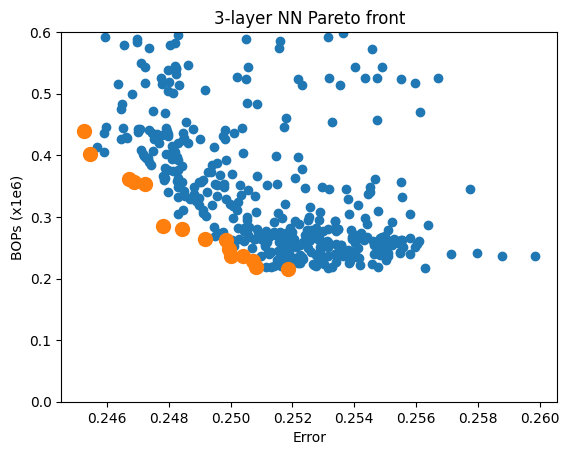

In [6]:
plt.figure()
y = np.array(y_list)
y_pareto = approximate_pareto(y)[0]
plt.scatter(1-y[:,0], 1/y[:,1])
plt.scatter(1-y_pareto[:,0], (1/y_pareto[:,1]),s=100)
plt.xlabel("Error")
plt.ylabel("BOPs (x1e6)")
#plt.yscale("log")
#plt.xlim(0.266, 0.284)
plt.ylim(0, 0.6)
plt.title("3-layer NN Pareto front")
# plt.xlim(left=y[:,0].min()*0.95, right=y[:,0].max()*1.05)
# plt.ylim(bottom=y[:,1].min()*0.95, top=y[:,1].max()*1.05)
plt.show()

In [20]:
pareto_points = np.array(ids)[approximate_pareto(y)[1]].tolist()
print(f"{'Config':12s} {'Perf':6s}  {'BOPS':8s}")
for p in pareto_points:
    print(f"{p:12s} {all_metrics[p]['performance']:.4f}  {all_metrics[p]['bops']:6.2f}")

Config       Perf    BOPS    
4_6_8_6_6    0.7501  263312.31
8_4_6_6_8    0.7531  355977.06
6_4_4_8_12   0.7522  285862.50
4_4_6_12_8   0.7496  236146.67
4_4_6_8_12   0.7493  227906.66
8_8_8_8_8    0.7548  438985.62
6_4_4_6_32   0.7516  280977.50
4_4_8_8_32   0.7500  237170.69
8_6_8_6_8    0.7545  402923.12
8_4_8_8_8    0.7533  361304.34
6_8_6_8_6    0.7528  354013.38
4_4_4_4_8    0.7482  215614.58
4_6_8_6_32   0.7508  264640.00
4_4_4_8_4    0.7492  218079.39
4_4_8_12_12  0.7500  247377.08
